In [319]:
# !pip install scikit-learn==1.5.2

In [ ]:
# Load some test data
import pandas as pd
mpg = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/mpg.csv')
original_mpg = mpg.copy()

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [321]:
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [322]:
# Import the libraries we need
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [323]:
# Get our target variable and features and split them into test and train datasets

X = mpg[['cylinders','displacement','acceleration', 'weight']]
y = mpg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [324]:
# Create the model and train it, use default hyperparameters for now
model = XGBRegressor()
model.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [325]:
# Get predictions for our test data
predictions = model.predict(X_test)
predictions

array([38.657696, 28.087242, 23.523146, 17.897999, 15.234213, 27.013454,
       22.056187, 11.940811, 16.265862, 19.103987, 13.940032, 31.308727,
       35.01516 , 16.411985, 26.870445, 13.404857, 27.392363, 19.531116,
       13.77361 , 37.423004, 35.091824, 18.268314, 18.177662, 30.06011 ,
       15.404021, 25.241917, 29.574886, 26.355955, 20.4689  , 10.909517,
       22.864702, 31.812233, 18.264406, 23.914774, 35.1818  , 14.921148,
       25.206757, 20.949095, 13.071755, 28.7247  , 23.589334, 25.701653,
       22.081858, 13.138733, 31.13615 , 27.268324, 24.874348, 25.438108,
       26.179909, 27.972618, 18.926208, 29.807665, 31.330664, 13.662537,
       25.912758, 13.90974 , 15.214119, 23.43225 , 25.944368, 21.094381,
       14.643568, 37.514183, 26.335974, 29.254011, 19.77668 , 23.710693,
       26.440866, 32.163937, 25.943663, 14.524177, 32.345703, 12.65041 ,
       14.335071, 27.323072, 20.730164, 21.49504 , 17.644854, 28.044266,
       29.646917, 15.890411], dtype=float32)

In [326]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import root_mean_squared_error

result = root_mean_squared_error(y_test, predictions)
result

# Looks like we're off by just 4.5 mpg on average
# Not a bad start

4.357173029067956

In [327]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,predictions)
r2

0.6468995254082205

In [328]:
# Horsepower has some missing values, represented as '?'
mpg[mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [329]:
# A great thing about XGBoost is that it will take care of NAs for you if you make them 0s
mpg.loc[mpg['horsepower']=="?",'horsepower'] = 0

# no need to normalize : https://github.com/dmlc/xgboost/issues/357
# automatic imputation : https://github.com/dmlc/xgboost/issues/21

In [330]:
mpg[mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name


In [331]:
mpg[374:375]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
374,23.0,4,151.0,0,3035,20.5,82,1,amc concord dl


In [332]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [333]:
mpg.horsepower = pd.to_numeric(mpg.horsepower)

In [334]:
mpg['origin'] = mpg['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
mpg = pd.get_dummies(mpg, columns=['origin'], prefix='', prefix_sep='')
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,Europe,Japan,USA
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,False,False,True
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,True,False,False
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,False,False,True
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,False,False,True
397,31.0,4,119.0,82,2720,19.4,82,chevy s-10,False,False,True


In [335]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
name             object
Europe             bool
Japan              bool
USA                bool
dtype: object

In [336]:
# Get our target variable and features and split them into test and train datasets

X = mpg[['cylinders', 'displacement', 'acceleration', 'weight','horsepower','year']]
y = mpg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [337]:
# Create the model and train it, use default hyperparameters for now
model = XGBRegressor()
model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [338]:
# Get predictions for our test data
predictions = model.predict(X_test)
predictions

array([31.17601 , 30.475006, 21.444052, 14.954515, 13.988824, 24.274317,
       28.081453, 11.74521 , 18.355724, 20.651142, 13.608611, 32.674904,
       29.717522, 15.115178, 24.997757, 12.830349, 30.861311, 17.843576,
       15.473388, 37.03103 , 24.198856, 18.621166, 31.15154 , 29.291988,
       16.214897, 37.49111 , 23.51644 , 24.801867, 19.063707, 12.788509,
       28.314089, 33.77061 , 18.609192, 24.23242 , 42.112827, 13.490092,
       23.318796, 20.587982, 14.845311, 25.401636, 26.811491, 30.23693 ,
       20.560696, 10.636703, 22.105764, 35.968548, 25.822939, 23.29103 ,
       24.28203 , 26.208738, 22.046455, 33.477345, 33.589294, 13.73314 ,
       26.968872, 12.874897, 16.473085, 26.957539, 22.974598, 19.375496,
       14.037185, 31.057304, 24.33324 , 20.429558, 18.6218  , 24.920017,
       20.337313, 33.993855, 24.411503, 14.758949, 34.183105, 14.396648,
       13.723373, 20.067343, 29.668564, 21.329838, 18.379223, 30.9153  ,
       28.991571, 17.450333], dtype=float32)

In [339]:
# Compute the Root Mean Squared Error of the predictions
# from sklearn.metrics import mean_squared_error

result = root_mean_squared_error(y_test, predictions)
result

# Looks like we're off by just 3.2 mpg on average
# Additional preprocessing could reduce this even further

2.6070987726115993

In [340]:
importance = model.feature_importances_
#for i,v in enumerate(importance):
  #print('Feature %s: %0d, Score: %.5f' % (X.columns[i],i,v))
  # plot feature importance

df = pd.DataFrame(list(zip(importance, X.columns.to_list())),columns =['importance', 'feature'])
print(importance,X.columns.to_list())
df.head()
# sns.barplot(data=importance,)

[0.0355477  0.49946642 0.01935349 0.08002999 0.1934194  0.172183  ] ['cylinders', 'displacement', 'acceleration', 'weight', 'horsepower', 'year']


,importance,feature
0,0.035548,cylinders
1,0.499466,displacement
2,0.019353,acceleration
3,0.080030,weight
4,0.193419,horsepower


<Axes: xlabel='importance', ylabel='feature'>

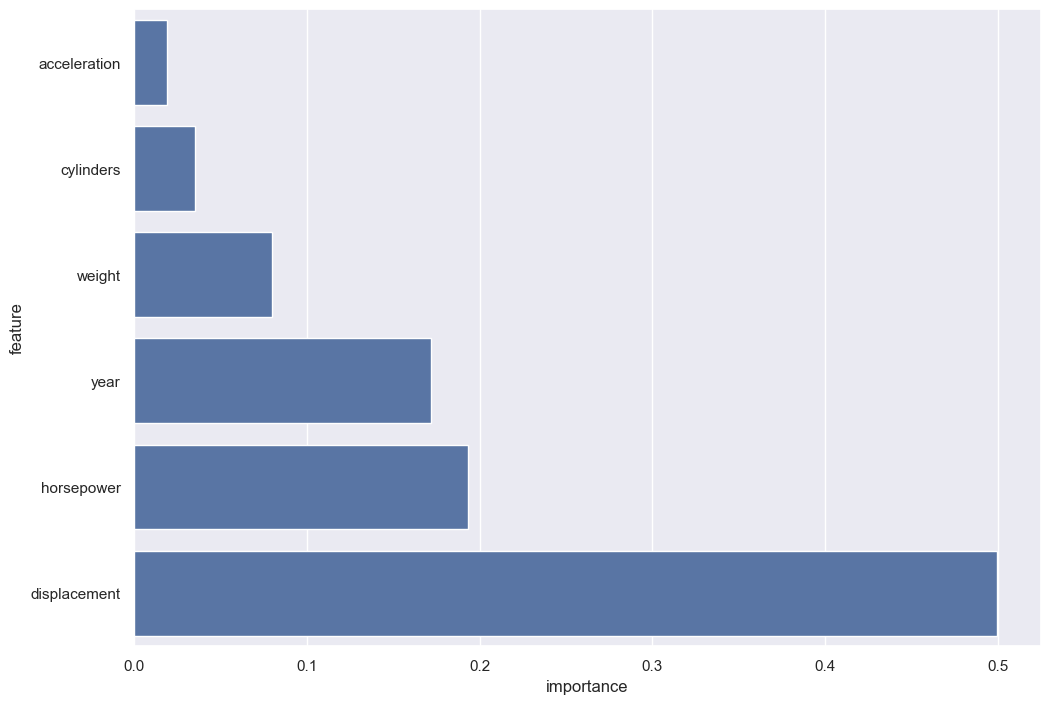

In [341]:
import seaborn as sns
df = df.sort_values(by='importance')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df,x='importance',y='feature')

In [342]:
mpg['maker'] = mpg['name'].str.split(' ').str[0]
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,Europe,Japan,USA,maker
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,False,False,True,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,False,False,True,buick
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,False,False,True,plymouth
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,False,False,True,amc
4,17.0,8,302.0,140,3449,10.5,70,ford torino,False,False,True,ford


In [343]:
one_hot = pd.get_dummies(mpg[['maker']], drop_first=False)
mpg = mpg.join(one_hot)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,Europe,Japan,...,maker_renault,maker_saab,maker_subaru,maker_toyota,maker_toyouta,maker_triumph,maker_vokswagen,maker_volkswagen,maker_volvo,maker_vw
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140,3449,10.5,70,ford torino,False,False,...,False,False,False,False,False,False,False,False,False,False


In [344]:
X = mpg.drop(columns=['name','maker','mpg'])
y = mpg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [345]:
# Create the model and train it, use default hyperparameters for now
model = XGBRegressor()
model.fit(X_train, y_train)
# Get predictions for our test data
predictions = model.predict(X_test)
predictions

array([29.924244, 29.073921, 20.335035, 14.88067 , 13.611688, 25.567505,
       27.361866, 11.974269, 20.093645, 21.341822, 14.020606, 33.17975 ,
       29.01603 , 15.366128, 25.262043, 12.37432 , 31.418037, 18.245607,
       15.405202, 37.21129 , 24.883804, 19.443153, 25.636675, 29.235577,
       16.479633, 37.241547, 24.919119, 24.905714, 18.084394, 11.928994,
       27.14005 , 31.306053, 15.831902, 23.165077, 41.487816, 13.999913,
       22.67672 , 19.640991, 14.636127, 25.332281, 27.943989, 28.159702,
       20.892897, 11.080752, 22.818518, 35.423344, 27.389902, 23.40521 ,
       24.423628, 26.284554, 21.993538, 33.893295, 35.196697, 12.375123,
       26.147545, 13.672139, 16.331875, 27.05556 , 23.523352, 19.426634,
       15.907942, 29.91711 , 24.898045, 20.11826 , 19.33288 , 24.79823 ,
       22.24285 , 34.5053  , 26.21626 , 15.33469 , 34.505466, 13.741993,
       13.196812, 20.346767, 26.86351 , 23.235254, 18.73389 , 30.374466,
       27.440666, 18.708675], dtype=float32)

In [346]:
# Compute the Root Mean Squared Error of the predictions
# from sklearn.metrics import mean_squared_error

result = root_mean_squared_error(y_test, predictions)
result

# Looks like we're off by just 3.1 mpg on average
# Additional preprocessing could reduce this even further

2.47487795695854

In [347]:
# hyperparameters modification

model = XGBRegressor(max_depth=4)
model.fit(X_train, y_train)
# Get predictions for our test data
predictions = model.predict(X_test)
# print(predictions)
result = root_mean_squared_error(y_test, predictions)
print(result)

2.591232985491291


In [348]:
# hyperparameters modification
model = XGBRegressor(max_depth=4,min_child_weight=8)
model.fit(X_train, y_train)
# Get predictions for our test data
predictions = model.predict(X_test)
# print(predictions)
result = root_mean_squared_error(y_test, predictions)
print(result)

2.3836753161124475


In [349]:
# hyperparameters modification
model = XGBRegressor(max_depth=4,learning_rate=0.3)
model.fit(X_train, y_train)
# Get predictions for our test data
predictions = model.predict(X_test)
# print(predictions)
result = root_mean_squared_error(y_test, predictions)
print(result)

2.591232985491291


In [350]:
# hyperparameters modification
model = XGBRegressor(objective='reg:squarederror',max_depth=2,learning_rate=0.05,min_child_weight=8,colsample_bytree=0.8,n_estimators=149)
model.fit(X_train, y_train)
# Get predictions for our test data
predictions = model.predict(X_test)
# print(predictions)
result = root_mean_squared_error(y_test, predictions)
print(result)

2.213155431577132


In [351]:
r2 = r2_score(y_test,predictions)
r2

0.908901228671659

In [352]:
# Export trained model and feature list for production
from joblib import dump
import json
# Save the trained XGBoost model
dump(model, 'xgb_model.joblib')
# Save the feature names (order matters) so we can reindex incoming data in production
feature_names = X.columns.to_list()
with open('feature_names.json', 'w') as f:
    json.dump(feature_names, f)
print('Saved model to xgb_model.joblib and feature_names.json')

Saved model to xgb_model.joblib and feature_names.json


In [ ]:
# Define a deterministic preprocessing function for production and test it
import pandas as pd
import json
from joblib import load

def preprocess_for_prod(df_raw, feature_list_path='feature_names.json'):
    df = df_raw.copy()
    
    # --- Numeric preprocessing ---
    if 'horsepower' in df.columns:
        df['horsepower'] = df['horsepower'].replace('?', 0).astype(float)
    
    # --- Categorical preprocessing ---
    if 'origin' in df.columns:
        df['origin'] = df['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'}).fillna('Unknown')
    if 'name' in df.columns:
        df['maker'] = df['name'].astype(str).str.split(' ').str[0]
    else:
        df['maker'] = 'Unknown'
    
    # --- One-hot encoding ---
    origin_dummies = pd.get_dummies(df['origin'], prefix='', prefix_sep='') if 'origin' in df.columns else pd.DataFrame(index=df.index)
    maker_dummies = pd.get_dummies(df[['maker']]) if 'maker' in df.columns else pd.DataFrame(index=df.index)
    
    # --- Combine numeric + dummies ---
    numeric_cols = [c for c in ['cylinders','displacement','acceleration','weight','horsepower','year'] if c in df.columns]
    Xcand = pd.concat([df[numeric_cols], origin_dummies, maker_dummies], axis=1)
    
    # --- Ensure features match expected list ---
    with open(feature_list_path) as f:
        expected = json.load(f)
    
    # Add missing columns
    for col in expected:
        if col not in Xcand.columns:
            Xcand[col] = 0
    # Keep only expected columns in order
    Xcand = Xcand[expected]
    
    return Xcand

# Quick sanity check: preprocess a slice of the original raw dataframe (aligned with y_test) and predict
raw_test = original_mpg.loc[y_test.index]
Xp = preprocess_for_prod(raw_test)
# Load saved model and predict to ensure pipeline works
loaded = load('xgb_model.joblib')
preds = loaded.predict(Xp)
from sklearn.metrics import mean_squared_error
print('Test RMSE after production preprocessing:', root_mean_squared_error(y_test, preds))

Test RMSE after production preprocessing: 2.213155431577132


In [ ]:
test_input = {
    "cylinders": 8,
    "displacement": 350,
    "acceleration": 11.5,
    "weight": 3693,
    "horsepower": 165,
    "year": 70,
    "origin": 1,
    "name": "buick skylark 320"
}

# Convert to a single-row DataFrame
df_test = pd.DataFrame([test_input])

# Preprocess using your existing function
Xp_test = preprocess_for_prod(df_test, feature_list_path='feature_names.json')

# Load your saved model
loaded_model = load('xgb_model.joblib')

# Make prediction
pred = loaded_model.predict(Xp_test)

print("Prediction for single test input:", pred[0])